In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%pip install pandas matplotlib mplsoccer

In [ ]:
# penalties in matches 2068 and 4039

import pandas as pd
frames = pd.read_json('/kaggle/input/dataset1/structured_data.json')
frames.head(25)

In [60]:
len(frames)

68316

In [61]:
frames.iloc[59999]

possession     {'trackable_object': None, 'group': 'away team'}
frame                                                     59999
data          [{'y': -24.2750361342, 'x': 0.51663275027, 'z'...
period                                                      2.0
time                                                   80:13.70
Name: 59999, dtype: object

In [62]:
frames.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,possession,frame,data,period,time
0,"{'trackable_object': None, 'group': None}",0,[],NaN,None
1,"{'trackable_object': None, 'group': None}",1,[],NaN,None
2,"{'trackable_object': None, 'group': None}",2,[],NaN,None
3,"{'trackable_object': None, 'group': None}",3,[],NaN,None
4,"{'trackable_object': None, 'group': None}",4,[],NaN,None


In [63]:
frames.iloc[59999].data

[{'y': -24.2750361342,
  'x': 0.51663275027,
  'z': 0.213633023251,
  'trackable_object': 55,
  'track_id': -446},
 {'y': -19.0349326815,
  'x': 18.4034055982,
  'trackable_object': 1302,
  'track_id': 8224},
 {'y': 0.546524567263,
  'x': 17.2497960953,
  'trackable_object': 24015,
  'track_id': 8225},
 {'y': -11.1854913348,
  'x': 17.7748691014,
  'trackable_object': 7745,
  'track_id': 8217},
 {'y': -10.955163774,
  'x': 19.3705662319,
  'trackable_object': 8039,
  'track_id': 8222},
 {'y': 1.86253370558,
  'x': 17.0251658303,
  'trackable_object': 2792,
  'track_id': 8216},
 {'y': 8.80357483455,
  'x': 15.0843068986,
  'trackable_object': 9449,
  'track_id': 8212},
 {'y': 8.76417187282,
  'x': 16.0598144077,
  'trackable_object': 5066,
  'track_id': 8213},
 {'y': -12.6991822379,
  'x': 10.1507497969,
  'trackable_object': 4460,
  'track_id': 8209},
 {'y': -3.63619836171,
  'x': -8.78722763062,
  'trackable_object': 9077,
  'track_id': 8205},
 {'y': -31.5191792988,
  'x': 2.480919429

In [64]:
frames = frames[["frame","data","time"]]
frames.head()

,frame,data,time
0,0,[],None
1,1,[],None
2,2,[],None
3,3,[],None
4,4,[],None


In [65]:
frames.iloc[59999]

frame                                                59999
data     [{'y': -24.2750361342, 'x': 0.51663275027, 'z'...
time                                              80:13.70
Name: 59999, dtype: object

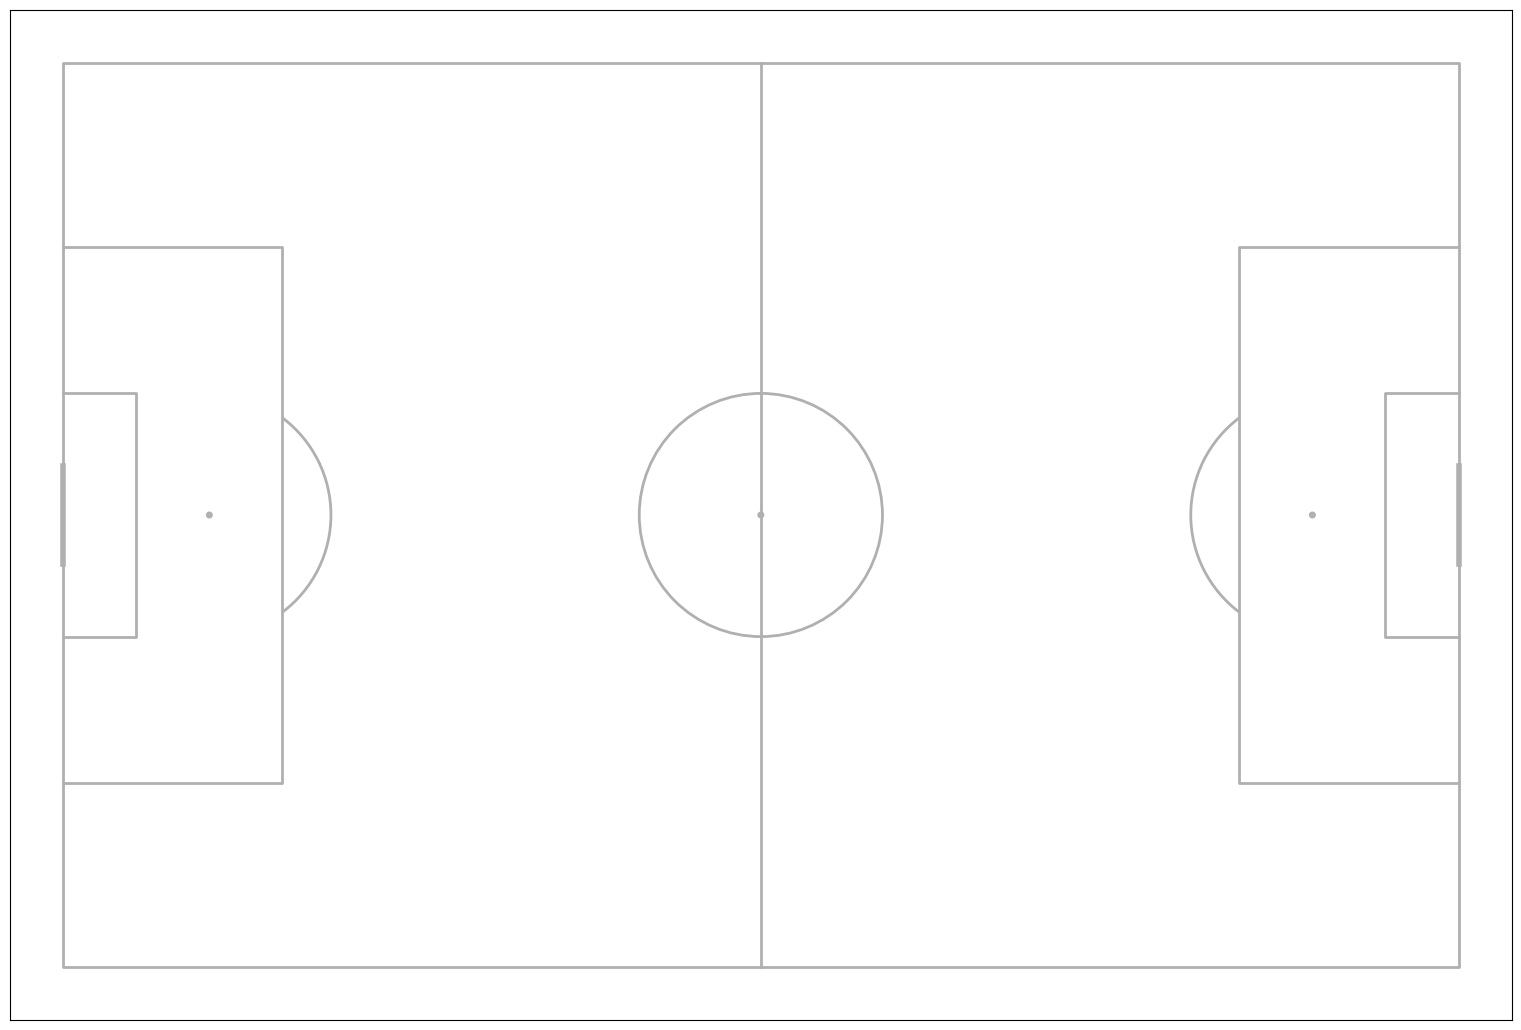

In [66]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
fig, ax = pitch.draw(figsize=(16, 10.4))

In [67]:
current_frame = frames[frames.frame == 59999]
current_frame

,frame,data,time
59999,59999,"[{'y': -24.2750361342, 'x': 0.51663275027, 'z'...",80:13.70


In [68]:
print(current_frame.columns)

Index(['frame', 'data', 'time'], dtype='object')


In [72]:
import warnings

# Suppress the runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data_list = frames.iloc[59999]['data']

# Convert the list of dictionaries into a DataFrame
df_data = pd.DataFrame(data_list)

# Now you can filter the ball and player positions
ball_pos = df_data[df_data['trackable_object'] == 55]
player_pos = df_data[df_data['trackable_object'] != 55]

print(ball_pos)
print(player_pos)

           y         x         z  trackable_object  track_id
0 -24.275036  0.516633  0.213633                55      -446
            y          x   z  trackable_object  track_id
1  -19.034933  18.403406 NaN              1302      8224
2    0.546525  17.249796 NaN             24015      8225
3  -11.185491  17.774869 NaN              7745      8217
4  -10.955164  19.370566 NaN              8039      8222
5    1.862534  17.025166 NaN              2792      8216
6    8.803575  15.084307 NaN              9449      8212
7    8.764172  16.059814 NaN              5066      8213
8  -12.699182  10.150750 NaN              4460      8209
9   -3.636198  -8.787228 NaN              9077      8205
10 -31.519179   2.480919 NaN             25648      8211
11   0.993389   9.414192 NaN             11513      8210
12 -22.983594   1.127935 NaN               515      8197
13  -0.846595   6.884595 NaN              9202      8198
14   6.034217   1.041966 NaN             11589      8199
15 -20.052087   0.03975

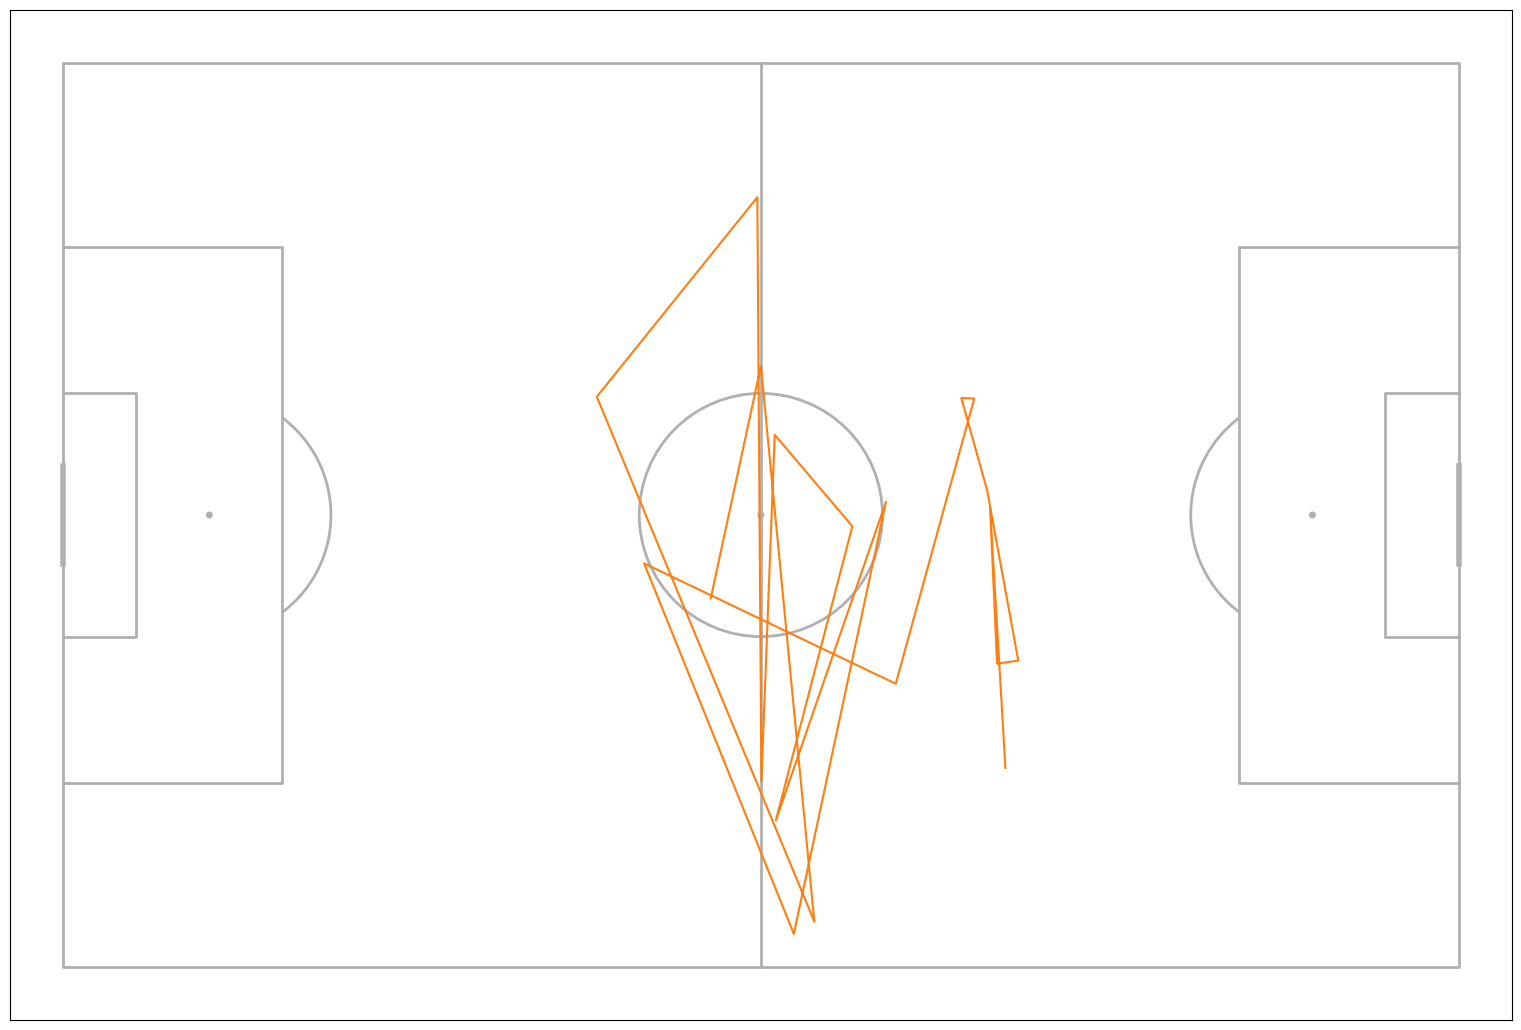

In [74]:
# Now we can see these two on the field. Let's recreate our pitch:
pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
fig, ax = pitch.draw(figsize=(16, 10.4))

ball, = ax.plot(
 ball_pos['x'],
 ball_pos['y'],
)
players, = ax.plot(
 player_pos['x'],
 player_pos['y'],
)

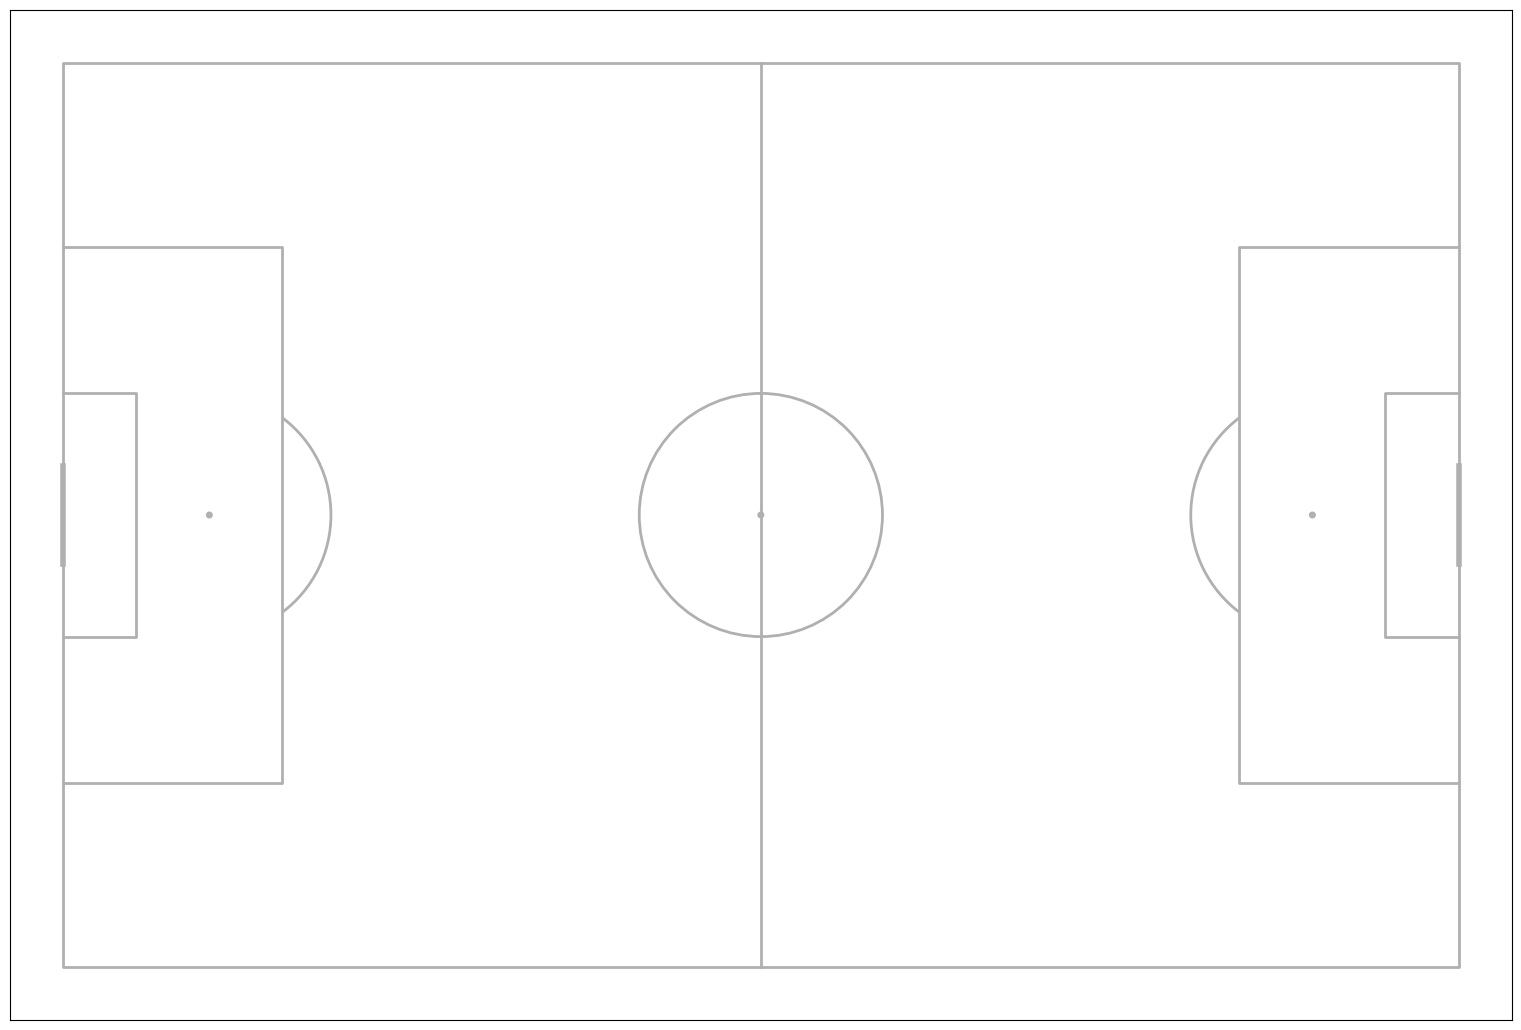

In [75]:
ball.set_linestyle('None')
players.set_linestyle('None')
fig

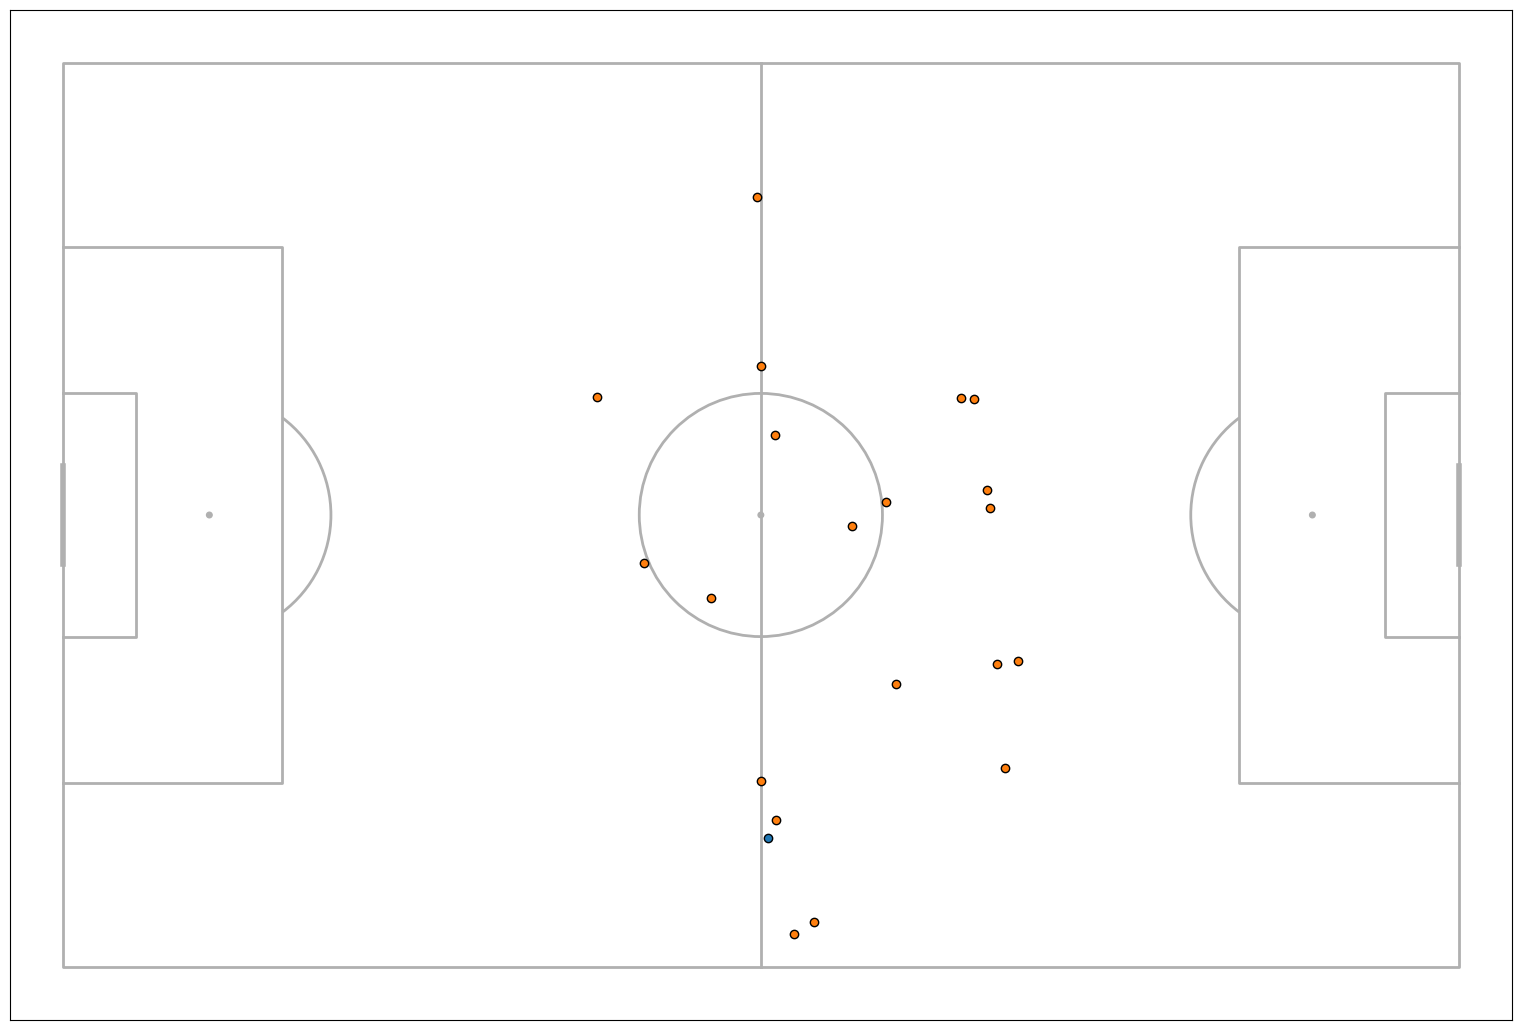

In [76]:
ball.set_marker('o')
ball.set_markeredgecolor('black')
players.set_marker('o')
players.set_markeredgecolor('black')
fig

In [99]:
def plot_frame(f):
 # f represents the frame we want to use, so let's make sure that gets propag
    current_frame = frames[frames.frame == f]
    ball_pos = df_data[df_data['trackable_object'] == 55]
    player_pos = df_data[df_data['trackable_object'] != 55]
    # Let's recreate our pitch, just to start with a clean slate:
    pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
    fig, ax = pitch.draw(figsize=(16, 10.4))
    # Now, let's plot the ball:
    ball, = ax.plot(
    ball_pos['x'],
    ball_pos['y'],
    marker="o",
    color="white",
    markersize=6,
    linestyle="None",
    markeredgecolor="black")

    players, = ax.plot(
    player_pos['x'],
    player_pos['y'],)

    players.set_linestyle('None')
    players.set_marker('o')
    players.set_markeredgecolor('black')

    return ball, players

(<matplotlib.lines.Line2D at 0x7a13fa4eeb90>,
 <matplotlib.lines.Line2D at 0x7a13fa4ef070>)

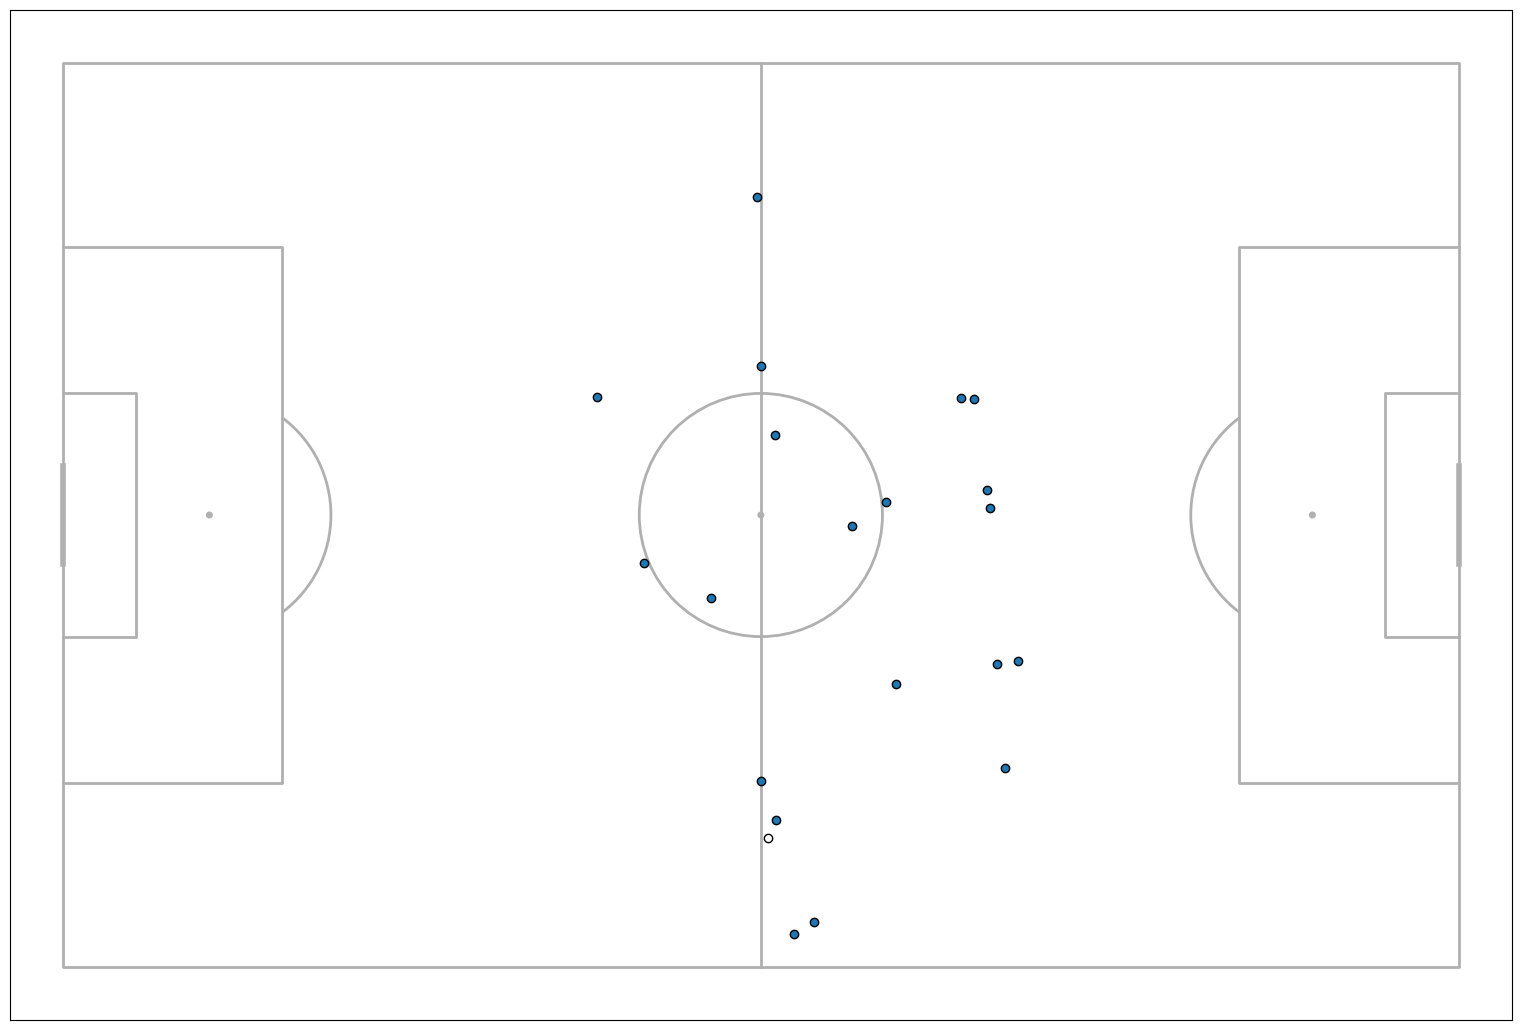

In [100]:
plot_frame(59999)

In [ ]:
import matplotlib.animation as animation
# ...and set a default so we can view the animation in Colab:
from matplotlib import rc
rc('animation', html='jshtml')
# Now, we have to build an animation object by declaring what we want to animate
anim = animation.FuncAnimation(
 fig, # our "foundation"
 plot_frame, # our "painter" -- our method to plot a given frame
 frames=list(range(59999, 60200)), # what to "paint" with -- the start and end
 interval=100, # how often we want to "paint" in milliseconds per frame (1 di
 blit=True # a default we are overridding for ease of use -- read more about
)
# View our completed animation below:
anim